In [2]:
# Loan Default Risk Analysis using EDA

## Problem Statement
The objective of this analysis is to identify patterns and driving factors behind loan default
using historical loan data. The analysis aims to help a consumer finance company minimize
credit loss by identifying risky applicants and improving loan approval decisions.

    ## Business Understanding

When a loan application is received, the company faces two types of risk:

1. Rejecting a creditworthy applicant results in loss of business.
2. Approving a loan for a risky applicant may lead to financial loss due to default.

The company wants to identify borrower and loan characteristics that strongly indicate
a higher probability of default, so that such risks can be mitigated.

    ## Data Understanding

The dataset contains loan records from 2007 to 2011.
Each record represents a loan issued to a customer.

Target Variable:
- loan_status
    - Fully Paid
    - Current
    - Charged Off (considered as default)

Only loans that were approved are present in the dataset.



    
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


SyntaxError: invalid syntax (661112495.py, line 4)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("loan.csv")  
df.head()

Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: 'loan.csv'

In [4]:
import os
os.getcwd()

'/Users/shatrupa'

In [5]:
os.listdir()

['.config',
 '.cortex-debug',
 'Music',
 '.condarc',
 '.DS_Store',
 '.CFUserTextEncoding',
 '.xonshrc',
 '.zshrc',
 'Pictures',
 '.zprofile',
 '.zsh_history',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 'Public',
 '.idlerc',
 '.tcshrc',
 '.anaconda',
 'Movies',
 '.Trash',
 '.ipynb_checkpoints',
 '.jupyter',
 'Documents',
 '.mysql_history',
 '.vscode',
 '.bash_profile',
 'Downloads',
 '.continuum',
 'LENDING CASE STUDY.ipynb',
 '.zsh_sessions',
 '.conda']

In [6]:
df = pd.read_csv("loan.csv")  
df.head()


/var/folders/4v/s65qt7rn0kd7f3vv8sx6lhnw0000gn/T/ipykernel_64131/14508516.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
df.shape


(39717, 111)

In [8]:
# Check shape
df.shape


(39717, 111)

In [9]:
# Check missing values
df.isnull().mean().sort_values(ascending=False)

verification_status_joint    1.0
annual_inc_joint             1.0
mo_sin_old_rev_tl_op         1.0
mo_sin_old_il_acct           1.0
bc_util                      1.0
                            ... 
delinq_amnt                  0.0
policy_code                  0.0
earliest_cr_line             0.0
delinq_2yrs                  0.0
id                           0.0
Length: 111, dtype: float64

In [19]:
# Drop columns with >40% missing values
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

In [11]:
# Keep only relevant loan statuses
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [12]:
# Create binary target variable
df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)


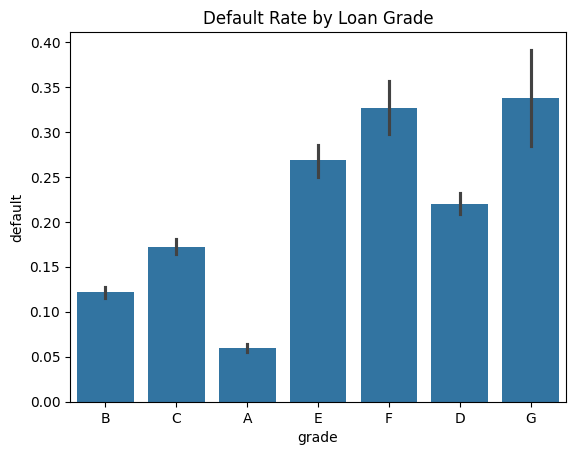

In [14]:
sns.barplot(x='grade', y='default', data=df)
plt.title("Default Rate by Loan Grade")
plt.show()


In [17]:
#Observation:
#Default rate increases significantly from Grade A to Grade G
#Lower grades represent higher risk borrowers


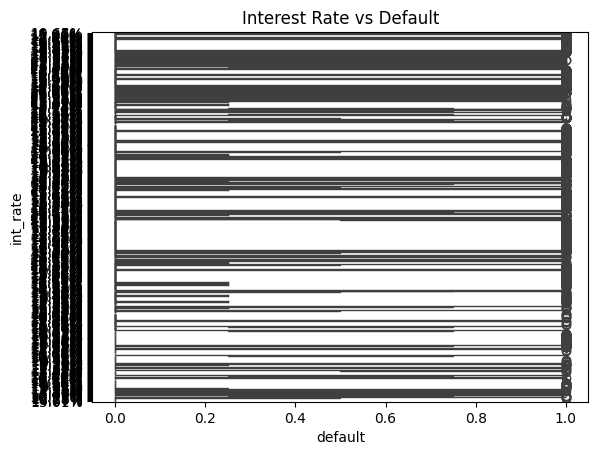

In [18]:
#MULTIVARIATE derived abnalysis
sns.boxplot(x='default', y='int_rate', data=df)
plt.title("Interest Rate vs Default")
plt.show()

In [20]:
#Observation:
#- Loans with higher interest rates have a higher likelihood of default


## Key Insights
#- Loan grade is the strongest indicator of default
#- Higher interest rates are associated with higher default probability
#- Lower income borrowers show higher risk
#- Certain loan purposes have higher default rates

## Business Recommendations

#- Apply stricter checks for lower-grade loans
#- Price risky loans with higher interest rates
#- Reduce exposure in high-risk loan purposes
#- Use these variables in credit scoring models

## Conclusion

#EDA reveals that both borrower characteristics and loan attributes
#significantly influence default risk. Identifying these drivers enables
#better lending decisions and reduced credit loss.



<Axes: xlabel='loan_status', ylabel='loan_amnt'>

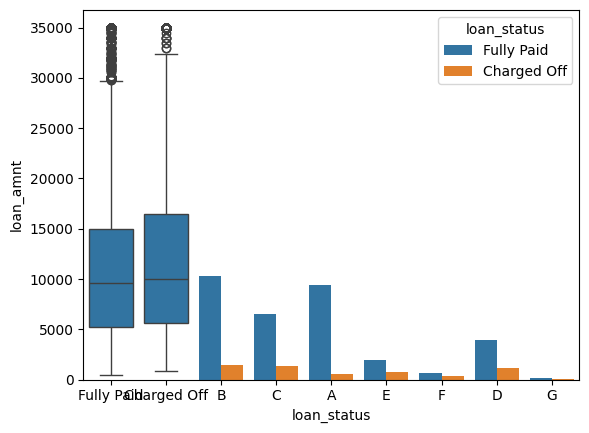

In [21]:
#target based analysis (box plot):This directly answers:“Which attributes differ for defaulters vs non-defaulters?”

sns.boxplot(x='loan_status', y='loan_amnt', data=df)
sns.countplot(x='grade', hue='loan_status', data=df)